<a href="https://colab.research.google.com/github/chaitu1904/-Customer-Segmentation-Analysis/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

df = pd.read_csv('/content/ifood_df.csv')  # already done


In [ ]:
print(df.columns)
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')
(2205, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income              

In [ ]:
print("Average Income:", df['Income'].mean())
print("Average Total Spend:", df['MntTotal'].mean())
print("Average Web Visits per Month:", df['NumWebVisitsMonth'].mean())


Average Income: 51622.0947845805
Average Total Spend: 562.7646258503402
Average Web Visits per Month: 5.3369614512471655


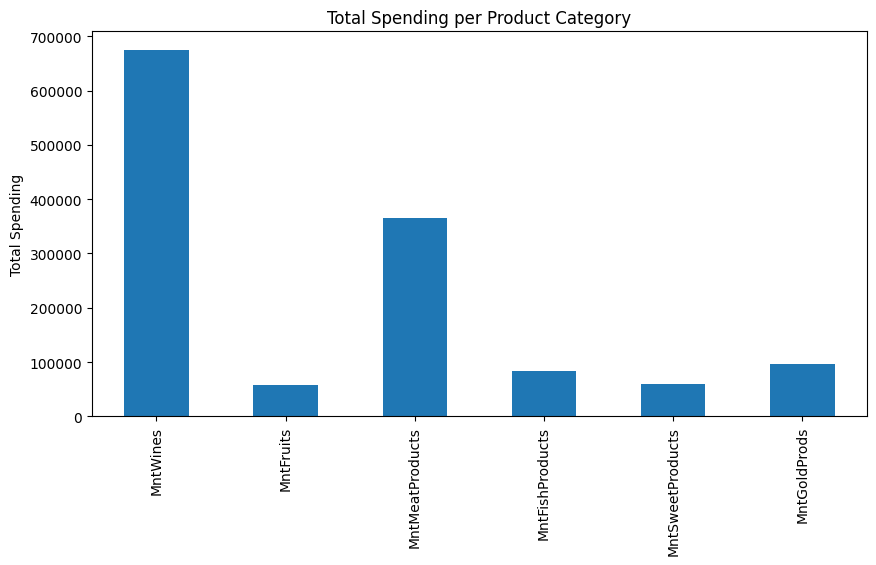

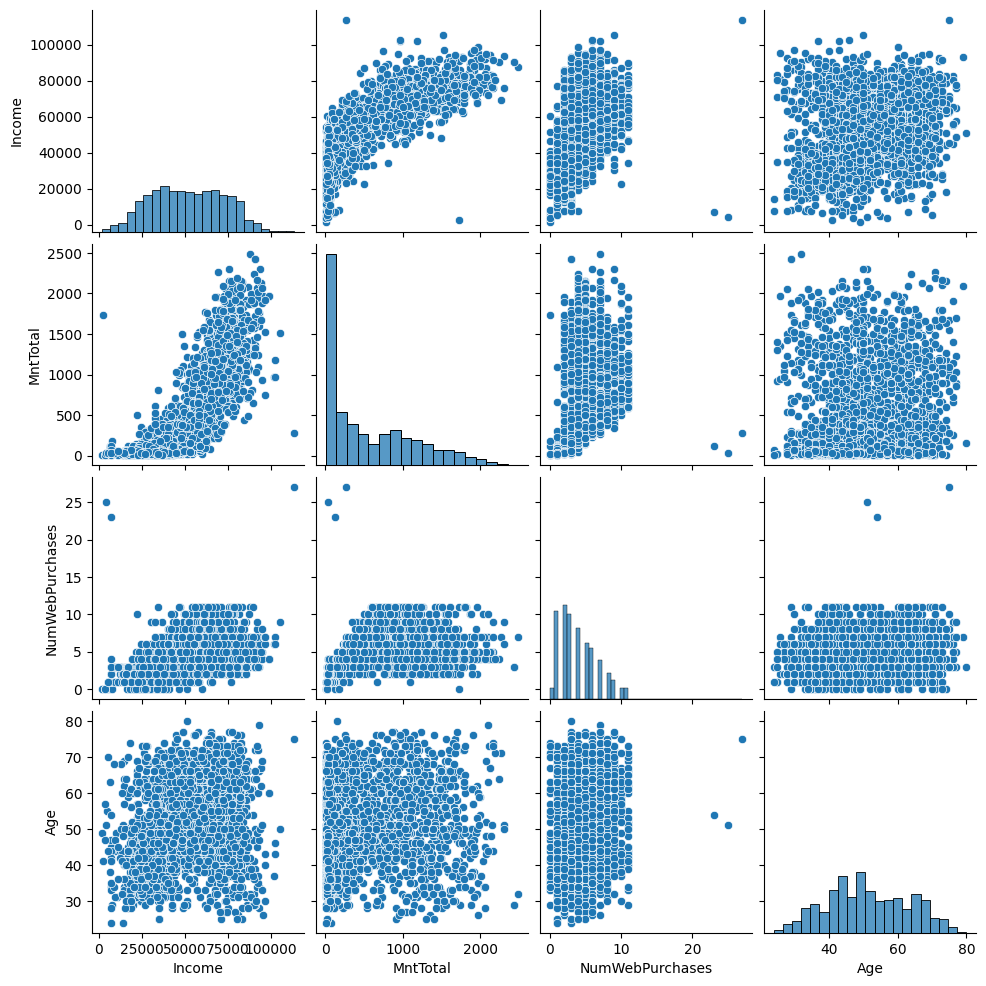

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Spending by Product Category
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[product_cols].sum().plot(kind='bar', title='Total Spending per Product Category', figsize=(10, 5))
plt.ylabel("Total Spending")
plt.show()

# Pairplot (only select numerical for speed)
sns.pairplot(df[['Income', 'MntTotal', 'NumWebPurchases', 'Age']])
plt.show()


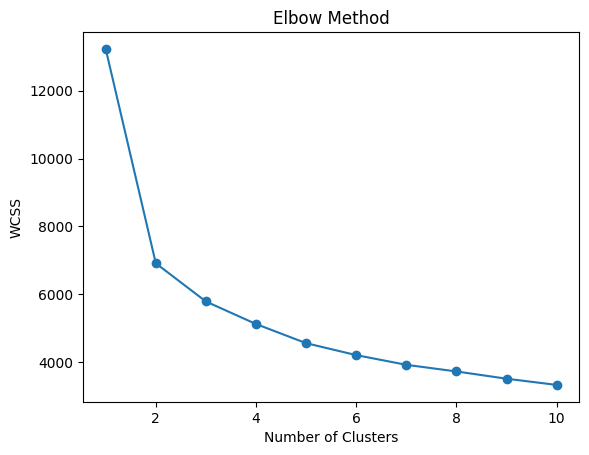

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Features for segmentation
features = df[['Income', 'MntTotal', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Age']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Find optimal K using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster counts
print(df['Cluster'].value_counts())


Cluster
2    669
3    571
0    543
1    422
Name: count, dtype: int64


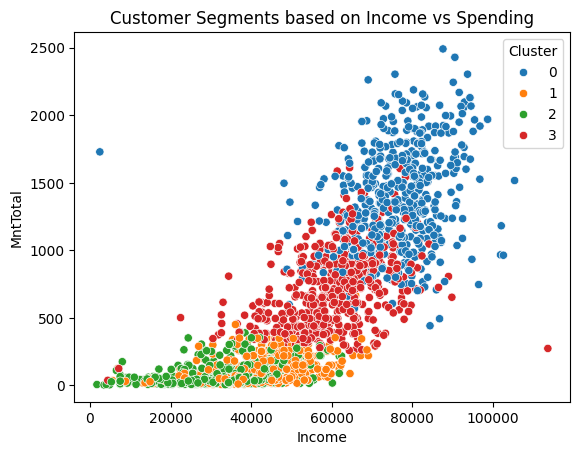

In [ ]:
sns.scatterplot(data=df, x='Income', y='MntTotal', hue='Cluster', palette='tab10')
plt.title("Customer Segments based on Income vs Spending")
plt.show()


In [ ]:
# Group by Cluster
cluster_summary = df.groupby('Cluster')[['Income', 'MntTotal', 'NumWebPurchases', 'Age']].mean()
print(cluster_summary)


               Income     MntTotal  NumWebPurchases        Age
Cluster                                                       
0        76061.209945  1372.092081         5.099448  51.808471
1        41529.803318   132.011848         2.492891  60.905213
2        31098.318386    73.177877         2.092676  41.919283
3        59886.392294   685.087566         6.691769  53.919440
